In [133]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import find_peaks
m= 1
k = 1
alpha = 0.05
x0= 2.2
v0x= 0

In [134]:
N=100000
tfinal=40
xt= np.empty(N)
xt[0]=x0
vxt= np.empty(N)
vxt[0]=v0x
t = np.empty(N)
t[0] = 0

em = np.empty(N)
ep0 = 0.5 * k * (xt[0])**2 + alpha* (xt[0])**3
ecin0 = 0.5 * m * vxt[0]**2
em[0] = ep0 + ecin0

maximum = []
minimum = []

period_list = []
amp_list = []

dt=tfinal/N

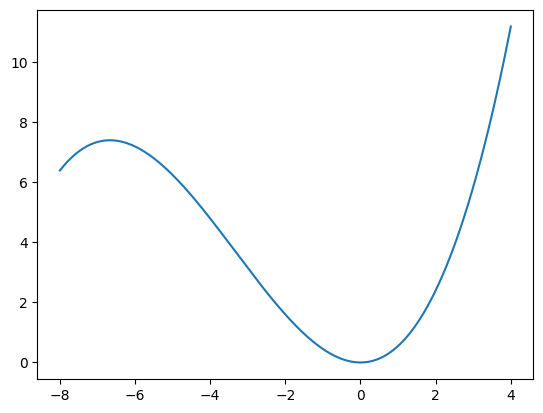

In [135]:
x = sy.symbols("x")
ep = 0.5*k*(x**2) + alpha*(x**3)
ep_lam = sy.lambdify(x, ep, "numpy")

x_vals = np.linspace(-8, 4, 1000)

plt.plot(x_vals, ep_lam(x_vals), linestyle="-")
plt.show()

In [136]:
#Caso a energia total for menor que 7J, o movimento irá oscilar entre valores positivos e negativos de x, diminuindo EP, aumentando Ecin, e revertendo esta transformação.
#Caso a energia total for maior que 8J, a massa conseguirá escapar desta oscilação, o que irá levar à perda da sua energia potencial, que será toda convertida para Ecin.

In [137]:
def eulercromer():
    for i in range(N-1):
        ax=-(k*xt[i] + 3 * alpha * (xt[i]**2))/m
        
        vxt[i+1]=vxt[i]+ax*dt
        xt[i+1]=xt[i]+vxt[i+1]*dt
        
        t[i+1]= t[i] + dt
        
        ep = 0.5 * k * (xt[i+1])**2 + alpha*(xt[i+1]**3)
        ecin = 0.5 * m * vxt[i+1]**2
        em[i+1] = ep + ecin

    return
eulercromer()

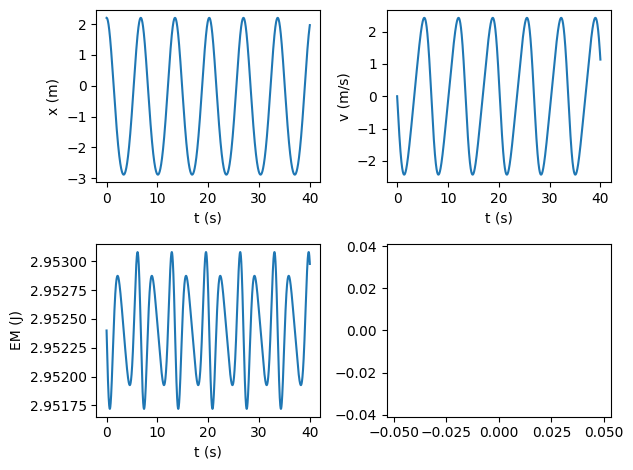

In [138]:
figure, axis = plt.subplots(2,2)
axis[0,0].plot(t, xt, linestyle="-")
axis[0,0].set_xlabel("t (s)")
axis[0,0].set_ylabel("x (m)")
axis[0,1].plot(t, vxt, linestyle="-")
axis[0,1].set_xlabel("t (s)")
axis[0,1].set_ylabel("v (m/s)")
axis[1,0].plot(t, em, linestyle="-")
axis[1,0].set_xlabel("t (s)")
axis[1,0].set_ylabel("EM (J)")
plt.axis('equal')
figure.tight_layout()

In [139]:
#A energia mecânica é aproximadamente 2.852 +/- 0.001 J.

In [140]:
 def abfourier(tp,xp,it0,it1,nf):
#
# cálculo dos coeficientes de Fourier a_nf e b_nf
#       a_nf = 2/T integral ( xp cos( nf w) ) dt   entre tp(it0) e tp(it1)
#       b_nf = 2/T integral ( xp sin( nf w) ) dt   entre tp(it0) e tp(it1)    
# integracao numerica pela aproximação trapezoidal
# input: matrizes tempo tp   (abcissas)
#                 posição xp (ordenadas) 
#       indices inicial it0
#               final   it1  (ao fim de um período)   
#       nf índice de Fourier
# output: af_bf e bf_nf  
# 
    dt=tp[1]-tp[0]
    per=tp[it1]-tp[it0]
    ome=2*np.pi/per

    s1=xp[it0]*np.cos(nf*ome*tp[it0])
    s2=xp[it1]*np.cos(nf*ome*tp[it1])
    st=xp[it0+1:it1]*np.cos(nf*ome*tp[it0+1:it1])
    soma=np.sum(st)
    
    q1=xp[it0]*np.sin(nf*ome*tp[it0])
    q2=xp[it1]*np.sin(nf*ome*tp[it1])
    qt=xp[it0+1:it1]*np.sin(nf*ome*tp[it0+1:it1])
    somq=np.sum(qt)
    
    intega=((s1+s2)/2+soma)*dt
    af=2/per*intega
    integq=((q1+q2)/2+somq)*dt
    bf=2/per*integq
    return (af,bf)

In [141]:
fourier_coef = [] 
for i in range(1, 30):
    fourier_coef.append(abfourier(t, xt, 0, N-1, i))

In [142]:
T = t[N-1] - t[0]  # período (100s)
omega = 2 * np.pi / T
n_vals = np.arange(1, 30)
omega_n = n_vals * omega

def separar_coeficientes(lista):
    a_n = np.array([par[0] for par in lista])
    b_n = np.array([par[1] for par in lista])
    return a_n, b_n

In [143]:
an, bn = separar_coeficientes(fourier_coef)

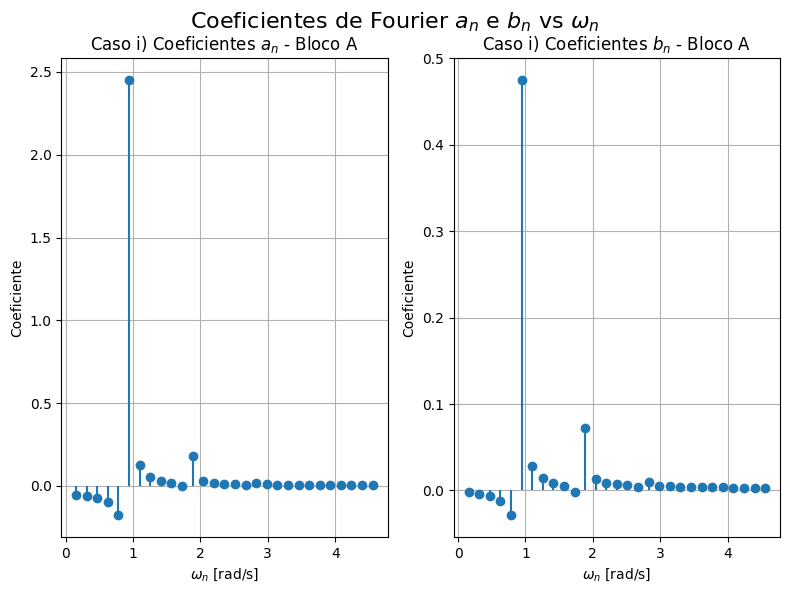

In [144]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
fig.suptitle("Coeficientes de Fourier $a_n$ e $b_n$ vs $\\omega_n$", fontsize=16)

# Caso 1
an, bn = separar_coeficientes(fourier_coef)  # assume que você já calculou os coeficientes
axs[0].stem(omega_n, an, basefmt=" ")
axs[0].set_title("Caso i) Coeficientes $a_n$ - Bloco A")
axs[1].stem(omega_n, bn, basefmt=" ")
axs[1].set_title("Caso i) Coeficientes $b_n$ - Bloco A")

for ax in axs.flat:
    ax.set_xlabel("$\\omega_n$ [rad/s]")
    ax.set_ylabel("Coeficiente")
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [145]:
#Como espectável, este oscilador tem um picos de an e bn (ou seja de amplitude) na sua frequência natural devido ao fenómeno de ressonância.
#Esta frequência é aproximadamente w0 = sqrt(k/m) = 1 rad/s.